In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
testA = pd.read_csv('testA.csv')

In [3]:
train['is_train'] = 1  # 标记为1表示来自训练集
testA['is_train'] = 0   # 标记为0表示来自测试集

In [4]:
data = pd.concat([train, testA], axis=0, ignore_index=True)

In [5]:
y_train = train['isDefault']

In [6]:
data = data.drop(columns=['isDefault'])

In [7]:
data.tail()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,is_train
999995,999995,7000.0,3,11.14,229.64,B,B2,330967.0,7 years,1,...,11.0,2.0,6.0,2.0,8.0,0.0,0.0,0.0,4.0,0
999996,999996,6000.0,3,6.24,183.19,A,A2,38930.0,1 year,1,...,14.0,12.0,13.0,6.0,25.0,0.0,0.0,0.0,0.0,0
999997,999997,14000.0,5,15.88,339.57,C,C4,282016.0,8 years,2,...,18.0,21.0,42.0,13.0,21.0,0.0,0.0,0.0,0.0,0
999998,999998,8000.0,3,18.06,289.47,D,D2,97.0,4 years,1,...,5.0,8.0,19.0,6.0,11.0,0.0,0.0,0.0,2.0,0
999999,999999,8000.0,3,6.68,245.85,A,A3,320.0,7 years,1,...,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0


In [8]:
data.shape

(1000000, 47)

In [9]:
train.shape

(800000, 48)

In [10]:
testA.shape

(200000, 47)

In [11]:
data.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'purpose',
       'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow',
       'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal',
       'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType',
       'earliesCreditLine', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3',
       'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14',
       'is_train'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  int64  
 1   loanAmnt            1000000 non-null  float64
 2   term                1000000 non-null  int64  
 3   interestRate        1000000 non-null  float64
 4   installment         1000000 non-null  float64
 5   grade               1000000 non-null  object 
 6   subGrade            1000000 non-null  object 
 7   employmentTitle     999999 non-null   float64
 8   employmentLength    941459 non-null   object 
 9   homeOwnership       1000000 non-null  int64  
 10  annualIncome        1000000 non-null  float64
 11  verificationStatus  1000000 non-null  int64  
 12  issueDate           1000000 non-null  object 
 13  purpose             1000000 non-null  int64  
 14  postCode            999999 non-null   float64
 15  regionCode      

In [13]:
data.isnull().any().sum()

22

<Axes: >

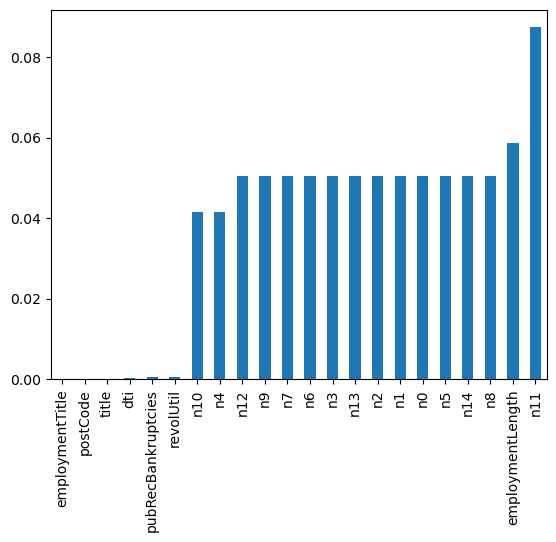

In [14]:
#可视化缺失值的比例
missing = data.isnull().sum()/len(data)
missing = missing[missing > 0]
# 对缺失值比例进行排序
missing.sort_values(inplace=True)
missing.plot.bar()

In [15]:
#查看data中是否有唯一值数量小于等于1的列
one_value_fea = [col for col in data.columns if data[col].nunique() <= 1]
one_value_fea

['policyCode']

In [16]:
#说明‘policyCode’是没有意义的，可以删除
data = data.drop(columns=['policyCode'])

In [17]:
# 选择数据类型不是 object 的列（即数值列），将这些列名转换为列表。
#定义数值特征列表和分类特征列表
numerical_fea = list(data.select_dtypes(exclude=['object']).columns)

#filter(lambda x: x not in numerical_fea, ...)：过滤出不在 numerical_fea 中的列名（即分类列）
category_fea = list(filter(lambda x: x not in numerical_fea,list(data.columns)))

In [18]:
numerical_fea


['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'is_train']

In [19]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [20]:
#数值特征变量分析——划分离散和连续（定义唯一值小于等于10的为离散，否则为连续）
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data,numerical_fea)


In [21]:
#返回连续型数值变量
numerical_serial_fea

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [22]:
#返回离散型数值特征
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12',
 'is_train']

In [23]:
#离散型数值特征分析
data['term'].value_counts()

term
3    758733
5    241267
Name: count, dtype: int64

In [24]:
data['homeOwnership'].value_counts()

homeOwnership
0    494678
1    397051
2    107910
3       223
5        98
4        40
Name: count, dtype: int64

In [25]:
data['verificationStatus'].value_counts()

verificationStatus
1    387568
2    311132
0    301300
Name: count, dtype: int64

In [26]:
data['initialListStatus'].value_counts()

initialListStatus
0    583108
1    416892
Name: count, dtype: int64

In [27]:
data['applicationType'].value_counts()

applicationType
0    980693
1     19307
Name: count, dtype: int64

In [28]:
data['n11'].value_counts()

n11
0.0    911963
1.0       677
2.0        30
3.0         2
4.0         1
Name: count, dtype: int64

In [29]:
data['n12'].value_counts()

n12
0.0    946562
1.0      2883
2.0       150
3.0        21
4.0         3
Name: count, dtype: int64

In [30]:
#类别型变量分析
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [31]:
data['grade'].value_counts()

grade
B    292055
C    283819
A    174588
D    149377
E     69671
F     23751
G      6739
Name: count, dtype: int64

In [32]:
data['subGrade'].value_counts()

subGrade
C1    63620
B4    61939
B5    61365
B3    60700
C2    58859
C3    55769
C4    55382
B2    55125
B1    52926
C5    50189
A5    47674
A4    38681
D1    38205
D2    33241
A1    32307
D3    29231
A3    28299
A2    27627
D4    26375
D5    22325
E1    17591
E2    15921
E3    13705
E4    11687
E5    10767
F1     7387
F2     5413
F3     4483
F4     3573
F5     2895
G1     2247
G2     1556
G3     1210
G4      917
G5      809
Name: count, dtype: int64

In [33]:
data['employmentLength'].value_counts()

employmentLength
10+ years    328525
2 years       90565
< 1 year      80226
3 years       80163
1 year        65671
5 years       62645
4 years       59818
6 years       46582
8 years       45168
7 years       44230
9 years       37866
Name: count, dtype: int64

In [34]:
data['issueDate'].value_counts()

issueDate
2016-03-01    36542
2015-10-01    31918
2015-07-01    30590
2015-12-01    28966
2014-10-01    26768
              ...  
2007-08-01       27
2007-07-01       25
2008-09-01       24
2007-09-01       11
2007-06-01        1
Name: count, Length: 139, dtype: int64

In [35]:
data['earliesCreditLine'].value_counts()

earliesCreditLine
Aug-2001    6957
Aug-2002    6779
Sep-2003    6710
Oct-2001    6636
Sep-2004    6556
            ... 
Feb-1960       1
Sep-1957       1
Jul-1955       1
May-1960       1
May-1961       1
Name: count, Length: 726, dtype: int64

In [36]:
features = [f for f in data.columns if f not in ['id','issueDate','is_train']]
features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'subGrade',
 'employmentTitle',
 'employmentLength',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [37]:
len(features)

43

In [38]:
#查看缺失值情况
data.isnull().sum()

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      58541
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
purpose                   0
postCode                  1
regionCode                0
dti                     300
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      521
revolBal                  0
revolUtil               658
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
n0                    50381
n1                    50381
n2                    50381
n3                    50381
n4                    41633
n5                  

In [39]:
len(category_fea)

5

In [40]:
len(numerical_fea)

41

In [41]:
data['employmentLength'].value_counts(dropna=False).sort_index()

employmentLength
1 year        65671
10+ years    328525
2 years       90565
3 years       80163
4 years       59818
5 years       62645
6 years       46582
7 years       44230
8 years       45168
9 years       37866
< 1 year      80226
NaN           58541
Name: count, dtype: int64

In [42]:
#对象类型特征转换到数值
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    elif isinstance(s,str):
        return np.int8(s.split()[0])
    else:
        return s

In [43]:
# 替换字符串
data['employmentLength'].replace('10+ years', '10 years', inplace=True)
data['employmentLength'].replace('< 1 year', '0 years', inplace=True)

# 将字符串转换为整数
data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)

In [44]:
data.info

<bound method DataFrame.info of             id  loanAmnt  term  interestRate  installment grade subGrade  \
0            0   35000.0     5         19.52       917.97     E       E2   
1            1   18000.0     5         18.49       461.90     D       D2   
2            2   12000.0     5         16.99       298.17     D       D3   
3            3   11000.0     3          7.26       340.96     A       A4   
4            4    3000.0     3         12.99       101.07     C       C2   
...        ...       ...   ...           ...          ...   ...      ...   
999995  999995    7000.0     3         11.14       229.64     B       B2   
999996  999996    6000.0     3          6.24       183.19     A       A2   
999997  999997   14000.0     5         15.88       339.57     C       C4   
999998  999998    8000.0     3         18.06       289.47     D       D2   
999999  999999    8000.0     3          6.68       245.85     A       A3   

        employmentTitle  employmentLength  homeOwnershi

In [45]:
numeric_features_data = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features_data = data.select_dtypes(include=['object']).columns

In [46]:
#以平均值填充
data[numeric_features_data] = data[numeric_features_data].fillna(data[numeric_features_data].median())
#按照众数填充类别型特征
data[categorical_features_data] = data[categorical_features_data].fillna(data[categorical_features_data].mode())

In [47]:
#查看缺失值情况
data.isnull().sum()

id                    0
loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10                   0
n11             

In [48]:
features = [f for f in data.columns if f not in ['id','issueDate','is_train']]

In [49]:
data['earliesCreditLine'].sample(5)

445454    Mar-1996
497269    Sep-2004
768017    Jun-2004
179186    Sep-1966
652291    Nov-1993
Name: earliesCreditLine, dtype: object

In [50]:
data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))

In [51]:
data['earliesCreditLine'].sample(5)

226161    2002
126231    2003
9569      2002
633637    2003
924679    1996
Name: earliesCreditLine, dtype: int64

In [52]:
# 部分类别特征
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', \
                 'applicationType', 'initialListStatus', 'title']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 298101
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 935
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 47903


In [53]:
# # 定义函数进行异常值处理（3-sigma法则）
# def find_outliers_by_3segama(data, fea):
#     data_std = np.std(data[fea])  # 计算标准差
#     data_mean = np.mean(data[fea])  # 计算均值
#     outliers_cut_off = data_std * 3  # 计算3倍标准差
#     lower_rule = data_mean - outliers_cut_off  # 下限
#     upper_rule = data_mean + outliers_cut_off  # 上限
    
#     # 标记异常值
#     data[fea+'_outliers'] = data[fea].apply(lambda x: '异常值' if x > upper_rule or x < lower_rule else '正常值')
#     return data

# # 仅对数值型特征进行异常值处理
# for fea in numerical_fea:
#     data = find_outliers_by_3segama(data, fea)  # 找到异常值
#     data = data[data[fea + '_outliers'] == '正常值']  # 保留“正常值”
#     data = data.drop(columns=[fea + '_outliers'])  # 删除标记列

# # 重置索引
# data = data.reset_index(drop=True)

In [54]:
data['grade'].sample(5)

626416    F
527994    C
640558    B
622887    A
701281    C
Name: grade, dtype: object

In [55]:
 data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [56]:
data['grade'].sample(5)

674194    2
607404    2
843345    2
900153    1
613704    4
Name: grade, dtype: int64

In [57]:
# 类型数在2之上，又不是高维稀疏的
data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode'], drop_first=True)

In [58]:
new_columns = data.columns.difference(features)  # 获取新生成的列名

In [59]:
new_columns

Index(['homeOwnership_1', 'homeOwnership_2', 'homeOwnership_3',
       'homeOwnership_4', 'homeOwnership_5', 'id', 'is_train', 'issueDate',
       'purpose_1', 'purpose_10',
       ...
       'subGrade_F3', 'subGrade_F4', 'subGrade_F5', 'subGrade_G1',
       'subGrade_G2', 'subGrade_G3', 'subGrade_G4', 'subGrade_G5',
       'verificationStatus_1', 'verificationStatus_2'],
      dtype='object', length=107)

In [60]:
len(data.columns)

145

In [61]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
#label-encode:subGrade,postCode,title
# 高维类别特征需要进行转换
for col in tqdm(['employmentTitle', 'postCode', 'title']):
    le = LabelEncoder()
    le.fit(list(data[col].astype(str).values))
    data[col] = le.transform(list(data[col].astype(str).values))
print('Label Encoding 完成')

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.58s/it]

Label Encoding 完成


In [62]:
data['employmentTitle'].sample(5)

215936     30206
734686    256267
42439      16934
393920    185692
293605     81794
Name: employmentTitle, dtype: int32

In [63]:
numerical_fea

['id',
 'loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'is_train']

In [64]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [65]:
features = [f for f in data.columns if f not in ['id','issueDate']]

In [66]:
features

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'grade',
 'employmentTitle',
 'employmentLength',
 'annualIncome',
 'postCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'earliesCreditLine',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14',
 'is_train',
 'subGrade_A2',
 'subGrade_A3',
 'subGrade_A4',
 'subGrade_A5',
 'subGrade_B1',
 'subGrade_B2',
 'subGrade_B3',
 'subGrade_B4',
 'subGrade_B5',
 'subGrade_C1',
 'subGrade_C2',
 'subGrade_C3',
 'subGrade_C4',
 'subGrade_C5',
 'subGrade_D1',
 'subGrade_D2',
 'subGrade_D3',
 'subGrade_D4',
 'subGrade_D5',
 'subGrade_E1',
 'subGrade_E2',
 'subGrade_E3',
 'subGrade_E4',
 'subGrade_E5',
 'subGrade_F1',
 'subGrade_F2',
 'subGrade_F3',
 'subGrade_F4',
 'subGrade_F5',
 'subGrade_G1',
 'subGrade_G2',
 'subGrade_G3',
 's

In [67]:
data.shape

(1000000, 145)

In [68]:
train = data[data['is_train'] == 1].drop(columns=['is_train'])
test = data[data['is_train'] == 0].drop(columns=['is_train'])

# # 如果需要提取目标变量 'isDefault'，可以这样操作
# train_y = train['isDefault']
# train_X = train.drop(columns=['isDefault'])

# # 对于 test 集，确保它不包含 'isDefault' 列
# test_X = test  # 如果 test 本来就没有 'isDefault' 列，直接赋值即可

In [69]:
train.head()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,issueDate,...,regionCode_41,regionCode_42,regionCode_43,regionCode_44,regionCode_45,regionCode_46,regionCode_47,regionCode_48,regionCode_49,regionCode_50
0,0,35000.0,5,19.52,917.97,5,192025,2.0,110000.0,2014-07-01,...,False,False,False,False,False,False,False,False,False,False
1,1,18000.0,5,18.49,461.90,4,104733,5.0,46000.0,2012-08-01,...,False,False,False,False,False,False,False,False,False,False
2,2,12000.0,5,16.99,298.17,4,189509,8.0,74000.0,2015-10-01,...,False,False,False,False,False,False,False,False,False,False
3,3,11000.0,3,7.26,340.96,1,249631,10.0,118000.0,2015-08-01,...,False,False,False,False,False,False,False,False,False,False
4,4,3000.0,3,12.99,101.07,3,256267,6.0,29000.0,2016-03-01,...,False,False,False,False,False,False,False,False,False,False


In [70]:
test.head()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,issueDate,...,regionCode_41,regionCode_42,regionCode_43,regionCode_44,regionCode_45,regionCode_46,regionCode_47,regionCode_48,regionCode_49,regionCode_50
800000,800000,14000.0,3,10.99,458.28,2,271265,10.0,80000.0,2014-07-01,...,False,False,False,False,False,False,False,False,False,False
800001,800001,20000.0,5,14.65,472.14,3,262182,10.0,50000.0,2015-07-01,...,False,False,False,False,False,False,False,False,False,False
800002,800002,12000.0,3,19.99,445.91,4,119041,2.0,60000.0,2016-10-01,...,False,False,False,False,False,False,False,False,False,False
800003,800003,17500.0,5,14.31,410.02,3,265125,4.0,37000.0,2014-11-01,...,False,False,False,False,False,False,False,False,False,False
800004,800004,35000.0,3,17.09,1249.42,4,232971,0.0,80000.0,2017-10-01,...,False,False,False,False,False,False,False,False,False,False


In [71]:
data.head()

,id,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,issueDate,...,regionCode_41,regionCode_42,regionCode_43,regionCode_44,regionCode_45,regionCode_46,regionCode_47,regionCode_48,regionCode_49,regionCode_50
0,0,35000.0,5,19.52,917.97,5,192025,2.0,110000.0,2014-07-01,...,False,False,False,False,False,False,False,False,False,False
1,1,18000.0,5,18.49,461.90,4,104733,5.0,46000.0,2012-08-01,...,False,False,False,False,False,False,False,False,False,False
2,2,12000.0,5,16.99,298.17,4,189509,8.0,74000.0,2015-10-01,...,False,False,False,False,False,False,False,False,False,False
3,3,11000.0,3,7.26,340.96,1,249631,10.0,118000.0,2015-08-01,...,False,False,False,False,False,False,False,False,False,False
4,4,3000.0,3,12.99,101.07,3,256267,6.0,29000.0,2016-03-01,...,False,False,False,False,False,False,False,False,False,False


In [72]:
len(features)

143

In [94]:
x_train = train.drop(columns=['id','issueDate'])

In [95]:
x_test = testA.drop(columns=['id','issueDate'])

In [96]:
common_features = x_train.columns.intersection(x_test.columns)
x_train = x_train[common_features]
x_test = x_test[common_features]


In [99]:
x_train.shape

(800000, 38)

In [100]:
x_test.shape

(200000, 38)

In [101]:
y_train.shape

(800000,)

In [102]:
x_train.tail(5)

,loanAmnt,term,interestRate,installment,grade,employmentTitle,employmentLength,annualIncome,postCode,dti,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
799995,25000.0,3,14.49,860.41,3,145357,7.0,72000.0,160,19.03,...,6.0,2.0,12.0,13.0,10.0,14.0,0.0,0.0,0.0,3.0
799996,17000.0,3,7.90,531.94,1,168143,10.0,99000.0,516,15.72,...,15.0,16.0,2.0,19.0,2.0,7.0,0.0,0.0,0.0,0.0
799997,6000.0,3,13.33,203.12,3,138795,10.0,65000.0,412,12.11,...,4.0,26.0,4.0,10.0,4.0,5.0,0.0,0.0,1.0,4.0
799998,19200.0,3,6.92,592.14,1,45602,10.0,96000.0,268,29.25,...,10.0,6.0,12.0,22.0,8.0,16.0,0.0,0.0,0.0,5.0
799999,9000.0,3,11.06,294.91,2,27055,5.0,120000.0,579,8.99,...,3.0,4.0,4.0,8.0,3.0,7.0,0.0,0.0,0.0,2.0


In [103]:
x_train.info

<bound method DataFrame.info of         loanAmnt  term  interestRate  installment  grade  employmentTitle  \
0        35000.0     5         19.52       917.97      5           192025   
1        18000.0     5         18.49       461.90      4           104733   
2        12000.0     5         16.99       298.17      4           189509   
3        11000.0     3          7.26       340.96      1           249631   
4         3000.0     3         12.99       101.07      3           256267   
...          ...   ...           ...          ...    ...              ...   
799995   25000.0     3         14.49       860.41      3           145357   
799996   17000.0     3          7.90       531.94      1           168143   
799997    6000.0     3         13.33       203.12      3           138795   
799998   19200.0     3          6.92       592.14      1            45602   
799999    9000.0     3         11.06       294.91      2            27055   

        employmentLength  annualIncome  pos

In [104]:
# 检查 x_train 和 x_test 中是否仍然存在类别型数据
categorical_columns_train = x_train.select_dtypes(include=['object']).columns
categorical_columns_test = x_test.select_dtypes(include=['object']).columns

print("x_train 中未编码的类别型数据列:")
print(categorical_columns_train)

print("\nx_test 中未编码的类别型数据列:")
print(categorical_columns_test)

# 如果存在未编码的列，使用 LabelEncoder 进行编码
for col in tqdm(categorical_columns_train):
    le = LabelEncoder()
    le.fit(list(x_train[col].astype(str).values))
    x_train[col] = le.transform(list(x_train[col].astype(str).values))

for col in tqdm(categorical_columns_test):
    le = LabelEncoder()
    le.fit(list(x_test[col].astype(str).values))
    x_test[col] = le.transform(list(x_test[col].astype(str).values))

print('剩余类别型数据的编码完成')



x_train 中未编码的类别型数据列:
Index([], dtype='object')

x_test 中未编码的类别型数据列:
Index(['grade', 'employmentLength', 'earliesCreditLine'], dtype='object')


0it [00:00, ?it/s]
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.28it/s]

剩余类别型数据的编码完成


In [105]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import time


In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np



In [111]:
def cv_model(clf, train_x, train_y, test_x, clf_name):
    folds = 5
    seed = 2020
    kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

    train = np.zeros(train_x.shape[0])
    test = np.zeros(test_x.shape[0])

    cv_scores = []

    for i, (train_index, valid_index) in enumerate(kf.split(train_x, train_y)):
        print('************************************ {} ************************************'.format(str(i+1)))
        trn_x, trn_y, val_x, val_y = train_x.iloc[train_index], train_y[train_index], train_x.iloc[valid_index], train_y[valid_index]

        if clf_name == "lgb":
            train_matrix = lgb.Dataset(trn_x, label=trn_y)
            valid_matrix = lgb.Dataset(val_x, label=val_y)

            params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'min_child_weight': 5,
                'num_leaves': 2 ** 5,
                'lambda_l2': 10,
                'feature_fraction': 0.8,
                'bagging_fraction': 0.8,
                'bagging_freq': 4,
                'learning_rate': 0.1,
                'seed': 2020,
                'nthread': 28,
                'n_jobs': 24,
                'verbose': -1,
                'verbose_eval': 200,
                'early_stopping_rounds': 200
            }

            model = lgb.train(params, train_matrix, 50000, valid_sets=[train_matrix, valid_matrix])
            val_pred = model.predict(val_x, num_iteration=model.best_iteration)
            test_pred = model.predict(test_x, num_iteration=model.best_iteration)
                
        elif clf_name == "xgb":
            train_matrix = xgb.DMatrix(trn_x, label=trn_y)
            valid_matrix = xgb.DMatrix(val_x, label=val_y)
            test_matrix = xgb.DMatrix(test_x)

            params = {
                'booster': 'gbtree',
                'objective': 'binary:logistic',
                'eval_metric': 'auc',
                'gamma': 1,
                'min_child_weight': 1.5,
                'max_depth': 5,
                'lambda': 10,
                'subsample': 0.7,
                'colsample_bytree': 0.7,
                'colsample_bylevel': 0.7,
                'eta': 0.04,
                'tree_method': 'exact',
                'seed': 2020,
                'nthread': 36,
                'verbose': 200,
            }

            watchlist = [(train_matrix, 'train'), (valid_matrix, 'eval')]

            model = xgb.train(params, train_matrix, num_boost_round=50000, evals=watchlist, 
                              verbose_eval=200, early_stopping_rounds=200)

            # 检查是否存在 best_ntree_limit 属性
            if hasattr(model, 'best_ntree_limit'):
                val_pred = model.predict(valid_matrix, ntree_limit=model.best_ntree_limit)
                test_pred = model.predict(test_matrix, ntree_limit=model.best_ntree_limit)
            else:
                val_pred = model.predict(valid_matrix)
                test_pred = model.predict(test_matrix)

        elif clf_name == "cat":
            params = {
                'learning_rate': 0.05,
                'depth': 5,
                'l2_leaf_reg': 10,
                'bootstrap_type': 'Bernoulli',
                'od_type': 'Iter',
                'od_wait': 50,
                'random_seed': 11,
                'allow_writing_files': False,
            }
            
            model = clf(iterations=20000, **params)
            model.fit(trn_x, trn_y, eval_set=(val_x, val_y), cat_features=[], use_best_model=True, verbose=500)
            
            val_pred = model.predict(val_x)
            test_pred = model.predict(test_x)
            
        train[valid_index] = val_pred
        test += test_pred / kf.n_splits
        cv_scores.append(roc_auc_score(val_y, val_pred))
        
        print(cv_scores)
       
    print("%s_score_list:" % clf_name, cv_scores)
    print("%s_score_mean:" % clf_name, np.mean(cv_scores))
    print("%s_score_std:" % clf_name, np.std(cv_scores))
    return train, test


In [112]:
# 1. LightGBM 模型函数
def lgb_model(x_train, y_train, x_test):
    lgb_train, lgb_test = cv_model(lgb, x_train, y_train, x_test, "lgb")
    return lgb_train, lgb_test

# 2. XGBoost 模型函数
def xgb_model(x_train, y_train, x_test):
    xgb_train, xgb_test = cv_model(xgb, x_train, y_train, x_test, "xgb")
    return xgb_train, xgb_test

# 3. CatBoost 模型函数
def cat_model(x_train, y_train, x_test):
    cat_train, cat_test = cv_model(CatBoostClassifier, x_train, y_train, x_test, "cat")
    return cat_train, cat_test

# 示例调用
lgb_train, lgb_test = lgb_model(x_train, y_train, x_test)
xgb_train, xgb_test = xgb_model(x_train, y_train, x_test)
cat_train, cat_test = cat_model(x_train, y_train, x_test)

************************************ 1 ************************************
[0.7256848784016312]
************************************ 2 ************************************
[0.7256848784016312, 0.7211170303745957]
************************************ 3 ************************************
[0.7256848784016312, 0.7211170303745957, 0.7263653745047234]
************************************ 4 ************************************
[0.7256848784016312, 0.7211170303745957, 0.7263653745047234, 0.7248154670729106]
************************************ 5 ************************************
[0.7256848784016312, 0.7211170303745957, 0.7263653745047234, 0.7248154670729106, 0.7240375699066193]
lgb_score_list: [0.7256848784016312, 0.7211170303745957, 0.7263653745047234, 0.7248154670729106, 0.7240375699066193]
lgb_score_mean: 0.724404064052096
lgb_score_std: 0.0018218334111979448
************************************ 1 ************************************
[0]	train-auc:0.69038	eval-auc:0.69029
[200]	train-

NameError: name 'CatBoostClassifier' is not defined

In [113]:
from catboost import CatBoostClassifier

In [114]:
cat_train, cat_test = cat_model(x_train, y_train, x_test)

************************************ 1 ************************************
0:	learn: 0.6675132	test: 0.6673728	best: 0.6673728 (0)	total: 281ms	remaining: 1h 33m 39s
500:	learn: 0.4483049	test: 0.4462835	best: 0.4462835 (500)	total: 1m 27s	remaining: 56m 30s
1000:	learn: 0.4452060	test: 0.4449596	best: 0.4449593 (999)	total: 3m	remaining: 57m 14s
1500:	learn: 0.4429576	test: 0.4443286	best: 0.4443265 (1498)	total: 4m 32s	remaining: 55m 58s
2000:	learn: 0.4409625	test: 0.4439219	best: 0.4439216 (1998)	total: 6m 1s	remaining: 54m 8s
2500:	learn: 0.4391364	test: 0.4436387	best: 0.4436377 (2488)	total: 7m 28s	remaining: 52m 18s
3000:	learn: 0.4374146	test: 0.4433799	best: 0.4433799 (3000)	total: 9m 25s	remaining: 53m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4433305034
bestIteration = 3154

Shrink model to first 3155 iterations.
[0.5380918164719445]
************************************ 2 ************************************
0:	learn: 0.6673204	test: 0.6675156